<a href="https://colab.research.google.com/github/DanielDialektico/dialektico-machine-learning-practices/blob/main/notebooks/Machine%20Learning/Aprendizaje%20Supervisado/M%C3%A9tricas_modelo_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://dialektico.com/wp-content/uploads/2023/03/MiniLogoW4.png" alt="Dialéktico Logo" />

# **Evaluación de modelos de clasificación 📑**

# **Introducción**

En una [práctica anterior](https://colab.research.google.com/github/DanielDialektico/dialektico-machine-learning-practices/blob/main/notebooks/Machine%20Learning/Aprendizaje%20Supervisado/Regresi%C3%B3n_Log%C3%ADstica.ipynb), ya hemos entrenado un modelo de **regresión logística**, el cual fungió como un modelo clasificador de **canciones** en **géneros musicales** respecto a ciertas características. Ahora calcularemos el rendimiento del modelo basándonos en lo que hemos visto en nuestra travesía sobre [métricas para evaluación de modelos de clasificación](https://dialektico.com/metricas-modelos-clasificacion/).

<br>
<center><img src="https://dialektico.com/wp-content/uploads/2025/01/MEMC_Colab.png" width="300" /></center>

<br>

#**Objetivo**

El objetivo de esta práctica es obtener valores de **métricas** de evaluación del modelo de clasificación que hemos entrenado anteriormente y analizar los resultados.

Utilizaremos las siguientes mediciones:

* Exactitud (accuracy).
* Precisión (precision).
* Sensibilidad (recall).
* Puntaje F1 (F1 score).
* Pérdida de entropía cruzada (cross entropy).

Con estos valores determinaremos qué tan bueno es el modelo para realizar clasificaciones sobre el **conjunto de datos de prueba**.

<br>
<center><img src="https://dialektico.com/wp-content/uploads/2025/01/MEMC_Colab_obj.png" width="400" /></center>

<br>

#Preparación de datos y librerías

Dado que utilizaremos **conjuntos de datos** de una exploración pasada, nos traeremos los datos ya preprocesados de canciones y sus características.

Primero, instalaremos e importaremos las librerías que utilizaremos.

***Nota*:** *Las instalaciones se realizan a pesar de que algunas librerías ya están integradas de forma nativa en Colab, esto para asegurar que el Notebook no presente problemas de ejecución si se dan cambios en la sintaxis entre versiones de librerías.*

In [ ]:
# Se instalan las librerías necesarias.
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install mlektic==0.0.10

Se importan las librerías y se establecen configuraciones adicionales:

In [ ]:
# Se importan las librerías.
from mlektic.logistic_reg import LogisticRegressionArcht
from mlektic import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Se filtran las advertencias.
warnings.filterwarnings('ignore')

# Se define el estilo de las gráficas.
plt.style.use('seaborn-v0_8-whitegrid')

# Se define el despliegue de flotantes en dataframes.
pd.options.display.float_format = '{:.2f}'.format

Como ya he mencionado con antelación, una de las librerías instaladas, y que utilizaremos para **entrenar** y **evaluar** los modelos, es la **librería** [mlektic](https://github.com/DanielDialektico/mlektic) que he desarrollado personalmente para este curso, y que estaremos usando ocasionalmente para aprender conceptos clave de **machine learning**. Sin embargo, considera que estas tareas se pueden realizar con otras librerías que veremos poco a poco a lo largo del curso (en nuestras experiencias pasadas, utilizamos [Sklearn](https://scikit-learn.org/stable/), la cual recomiendo mucho aprender a utilizar, y que estaremos invocando más adelante).

Ahora cargamos el conjunto de datos de canciones:

In [ ]:
dataset = pd.read_csv('https://github.com/DanielDialektico/dialektico-machine-learning-practices/raw/refs/heads/main/data/Spotify_genres_prep.csv', encoding='latin1')
dataset

,Nombre,Bailabilidad,Energía,Género
0,TQG,0.72,0.63,1
1,Me Porto Bonito,0.91,0.71,1
2,Tití Me Preguntó,0.65,0.71,1
3,Chanel,0.85,0.68,1
4,Classy 101,0.86,0.66,1
...,...,...,...,...
85,Deathcrush,0.22,0.91,0
86,FTBS,0.27,0.91,0
87,Stress Builds Character,0.29,0.78,0
88,Fear of Failure,0.25,0.92,0


<br>

# **Modelo de clasificación**

Ya que tenemos los **datos** cargados, utilizaremos una **regresión logística** para modelar la relación entre las variables de **entrada** y **salida**. Anteriormente habíamos entrenado un modelo que clasificaba canciones en géneros musicales (**Reggaetón** y **black metal**) conforme a su grado de **bailabilidad**. Esta vez, haremos una pequeña variación y calcularemos las probabilidades respecto a la **energía** de la canción (una medida de la intensidad o actividad de la misma).

Entrenamos el modelo con mlektic como se muestra a continuación:

In [ ]:
# Se generan los conjuntos de entrenamiento y prueba para las entradas (x) y salidas (y), con una proporción 80-20. Se eleccionan las entradas con input_columns
# y la salida con output_column.
train_set, test_set = preprocessing.pd_dataset(dataset, input_columns=['Energía'], output_column='Género', train_fraction = 0.8)

# Se crea el objeto para realizar la regresión lineal.
log_reg  = LogisticRegressionArcht()

# Se entrena el modelo.
log_reg.train(train_set)

Model trained using Maximum Likelihood Estimation (MLE).


Graficamos los resultados:

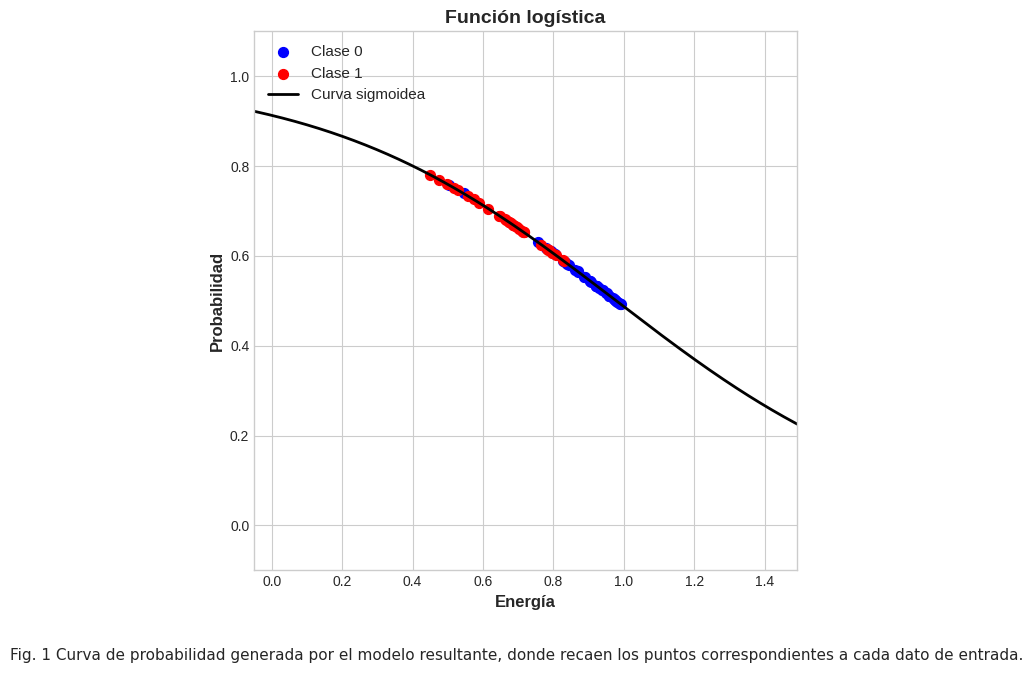

In [ ]:
# Se crea un rango de valores para el eje x.
x_range = np.linspace(dataset['Energía'].min() - 0.7, dataset['Energía'].max() + 0.7, 1000).reshape(-1, 1)

# Se calculan las probabilidades.
logistic_curve = log_reg.predict_prob(x_range)[:, 1]

# Se grafican los puntos y la curva.
plt.figure(figsize=(7, 7))

# Se obtienen las entradas y salidas del conjunto de entrenamiento.
train_x, train_y = train_set
train_x = train_x.squeeze()  # Asegurarse de que sea un array 1D.

# Se grafican los puntos de las dos clases.
plt.scatter(train_x[train_y == 0], log_reg.predict_prob(train_x[train_y == 0].reshape(-1, 1))[:, 1], color='blue', s=50, label='Clase 0')
plt.scatter(train_x[train_y == 1], log_reg.predict_prob(train_x[train_y == 1].reshape(-1, 1))[:, 1], color='red', s=50, label='Clase 1')

# Se grafica la curva logística.
plt.plot(x_range, logistic_curve, color='black', linewidth=2, label='Curva sigmoidea')

# Se configura la gráfica.
plt.title("Función logística", fontsize=14, fontweight='bold')
plt.xlabel("Energía", fontsize=12, fontweight='bold')
plt.ylabel("Probabilidad", fontsize=12, fontweight='bold')
plt.ylim(-0.1, 1.1)
plt.xlim(dataset['Energía'].min() - 0.5, dataset['Energía'].max() + 0.5)
plt.legend(loc='upper left', fontsize=11)
plt.suptitle("Fig. 1 Curva de probabilidad generada por el modelo resultante, donde recaen los puntos correspondientes a cada dato de entrada.", fontproperties={'family': 'DejaVu Sans', 'size': 11}, y=-0.001)
plt.grid(True)
plt.show()


Podrás observar que parece que las **predicciones** (puntos rojos y azules) tienen una separación relativamente consistente. Sin embargo, también es notoria la revoltura de algunos datos, lo que indica una **precisión** de predicción no perfecta. Para no atenernos solo a nuestras percepciones, utilizaremos las métricas de rendimiento propuestas.

<center><img src="https://dialektico.com/wp-content/uploads/2025/01/MEMC_KC1.png" width="400" /></center>

<center><img src="https://dialektico.com/wp-content/uploads/2025/01/MEMC_DC1.png" width="400" /></center>

<br>

# **Evaluando el modelo**

Ahora evaluaremos las **capacidades predictivas** del modelo ajustado: ¿qué tan bien realiza las clasificaciones de datos?

Primero, obtendremos la **matriz de confusión**, la cual nos mostrará la cantidad de **positivos** y **negativos** predichos correctamente:

In [ ]:
# Se obtiene la matriz de confusión utilizando el conjunto de datos de prueba (test_set).
confusion_matrix = log_reg.eval(test_set, 'confusion_matrix', to_df=True)

confusion_matrix

,Actual Positive (1),Actual Negative (0)
Predicted Positive (1),8.00 True Positives (TP),0.00 False Positives (FP)
Predicted Negative (0),3.00 False Negatives (FN),7.00 True Negatives (TN)


De esta podemos notar que tenemos lo siguiente:

- 8 Verdaderos Positivos, es decir, 8 valores categorizados correctamente en la clase 1 (Reggaetón).
- 0 Falsos Positivos, es decir, 0 valores categorizados incorrectamente en la clase 1 (Reggaetón).
- 7 Verdaderos Negativos, es decir, 7 valores categorizados correctamente en la clase 0 (black metal).
- 3 Falsos Negativos, es decir, 3 valores categorizados incorrectamente en la clase 0 (black metal).


Desde aquí podemos notar algunos detalles, por ejemplo, no hay **falsos positivos**, pero sí hay **verdaderos positivos**, por lo que la predicción de positivos ha sido altamente efectiva. Sin embargo, sí tenemos predicciones erróneas en los **falsos negativos**, lo que implica predicciones incorrectas.

Estas son solo premisas inmediatas, pasemos al cálculo de las métricas de evaluación basadas en la matriz de confusión.

<br>

## **Exactitud (accuracy)**

Comenzamos con el cálculo de la **exactitud** de clasificación del modelo:

In [ ]:
accuracy = log_reg.eval(test_set, 'accuracy')
print(f'La exactitud del modelo es aproximadamente: {accuracy:.2f}')

La exactitud del modelo es aproximadamente: 0.83


### **Interpretación**

Recordemos que este valor representa la proporción de **predicciones** correctas sobre el total de casos. El resultado indica que el modelo clasifica correctamente el género del 83% de las canciones, lo que significa un rendimiento aceptable tomando en cuenta que la variable <<**Energía**>> puede presentar pequeñas variaciones entre un género y otro.
También debemos tomar en cuenta que esta métrica no considera el equilibrio entre clases, es decir, puede ser afectada si las clases están desbalanceadas, lo cual en este caso no aplica.

<br>

## **Precisión (precision)**

Ahora obtenemos la exactitud de clasificación del modelo:

In [ ]:
precision = log_reg.eval(test_set, 'precision')
print(f'La precisión del modelo es aproximadamente: {precision:.2f}')

La precisión del modelo es aproximadamente: 1.00


### **Interpretación**

Para interpretar esta medida debemos rememorar que esta indica qué tan precisas son las **clasificaciones positivas** del modelo (de la clase 1, es decir, Reggaetón).

En este caso, todas las canciones categorizadas como parte del género Reggaetón realmente pertenecen a este género. No hay falsos positivos (FP), lo que demuestra un excelente rendimiento en esta métrica.


<br>

## **Sensibilidad (recall)**

Proseguimos con el cálculo de la sensibilidad:

In [ ]:
recall = log_reg.eval(test_set, 'recall')
print(f'La sensibilidad del modelo es aproximadamente: {recall:.2f}')

La sensibilidad del modelo es aproximadamente: 0.73


### **Interpretación**

La **sensibilidad** está midiendo la proporción de verdaderos positivos correctamente identificados entre todas las canciones que son realmente de Reggaetón. Aquí, el modelo identifica correctamente el 73% de las canciones de Reggaetón, lo que indica que algunas canciones de este género no se detectan correctamente, es decir, hay falsos negativos (recordemos que un falso negativo es un positivo mal clasificado), como puede constatarse en la matriz de confusión.

La presencia de falsos negativos indica que se clasificaron mal algunos datos que en realidad forman parte de la clase positiva. Si deseamos que nuestro modelo sea altamente capaz en la identificación de la clase positiva disminuyendo los falsos negativos, tendríamos que optimizar el modelo para mejorar esta métrica.


Además, recordemos que la energía es una medida de la intensidad de una canción, y, por lo visto en la **Figura 1**, la tendencia es que, a menor energía, mayor es la **probabilidad** de pertenecer a la clase 1, o dicho de otra forma: las canciones de Reggaetón suelen ser menos energéticas que las de black metal, y, a juzgar por la presencia de falsos negativos, hay canciones de Reggaetón con energías que pareciera que corresponden al black metal.

<br>

## **Puntaje F1 (F1 Score)**

Vayamos con la última métrica de la matriz de confusión. La calculamos como sigue:

In [ ]:
f1_score = log_reg.eval(test_set, 'f1_score')
print(f'El puntaje F1 del modelo es aproximadamente: {f1_score:.2f}')

El puntaje F1 del modelo es aproximadamente: 0.84


### **Interpretación**

Es necesario recordar que el **puntaje F1** es la media armónica entre la precisión y el recall, utilizada para balancear estas métricas.

Un F1-Score de 0.84 indica un buen balance entre la capacidad del modelo de predecir correctamente las canciones de Reggaetón y reducir los falsos positivos y negativos. Esto quiere decir que, si no priorizamos la **precisión** o la **sensibilidad**, esta métrica está arrojando un balance aceptable de las capacidades predictivas del modelo.

<br>

## **Entropía Cruzada (Cross Entropy)**

Por último, utilizaremos la [función de pérdida logística](https://dialektico.com/funcion-perdida-regresion-logistica/) para obtener una medida de qué tanto se aproximan las probabilidades a las etiquetas del terreno fundamental (valores reales):

In [ ]:
binary_crossentropy = log_reg.eval(test_set, 'binary_crossentropy')
print(f'La entropía cruzada del modelo es aproximadamente: {binary_crossentropy:.2f}')

La entropía cruzada del modelo es aproximadamente: 0.58


La **entropía cruzad**a se interpreta como una medida de qué tan bien el modelo predice las probabilidades correctas para las clases (en este caso, Reggaetón y Black Metal). Específicamente, la entropía cruzada evalúa el nivel de "incertidumbre" o "error" entre las predicciones del modelo y las etiquetas reales. Un valor de 0.578 sugiere que el modelo todavía tiene margen para mejorar, aunque no está muy lejos de ser óptimo. Para modelos bien entrenados, esta métrica tiende hacia 0. Por lo tanto, el modelo podría considerarse razonablemente bueno, pero no perfecto.

<br>

## **Conclusión de evaluaciones**

Podemos concluir lo siguiente sobre las métricas aquí analizadas:

- La **precisión** perfecta (1.0) implica que el modelo tiene un excelente desempeño evitando errores al identificar canciones que no son Reggaetón. La alta **exactitud** (83.33%) y **puntaje F1** (0.84) muestran que el modelo generaliza bien para este problema.

Sin embargo, el **recall** de 72.73% indica que el modelo falla al clasificar correctamente algunas canciones de Reggaetón, lo cual es relevante si es más importante detectar todas las canciones de este género (dependerá de la naturaleza del problema).

En conclusión, este modelo es confiable para aplicaciones donde es crítico evitar falsos positivos (por ejemplo, identificar exclusivamente canciones de Reggaetón sin clasificar Black Metal erróneamente como tal).
Sin embargo, si la prioridad es minimizar los falsos negativos, se podría ajustar el modelo para mejorar el recall.

Las formas de mejorar el rendimiento de modelos son variadas y las estaremos explorando muy pronto en una travesía futura.

<br>

# **Ejercicio**

Hasta aquí concluimos con esta práctica, pero aún puedes poner a prueba tus conocimientos realizando mediciones sobre el desempeño de un modelo ajustado a la variable bailabilidad.

Para esto usamos el mismo conjunto de datos:

In [ ]:
dataset

,Nombre,Bailabilidad,Energía,Género
0,TQG,0.72,0.63,1
1,Me Porto Bonito,0.91,0.71,1
2,Tití Me Preguntó,0.65,0.71,1
3,Chanel,0.85,0.68,1
4,Classy 101,0.86,0.66,1
...,...,...,...,...
85,Deathcrush,0.22,0.91,0
86,FTBS,0.27,0.91,0
87,Stress Builds Character,0.29,0.78,0
88,Fear of Failure,0.25,0.92,0


Puedes utilizar mlektic justo como hicimos antes, pero especificando que la variable de entrada (`input_columns`) es <<bailabilidad>>. Debajo te dejaré comentarios como una guía de los pasos que debes considerar:


In [ ]:
# Se generan los conjuntos de entrenamiento y prueba para las entradas (x)
# y salidas (y), con una proporción 80-20. Se eleccionan las entradas con
# input_columns y la salida con output_column.


# Se crea el objeto para realizar la regresión lineal.


# Se entrena el modelo.


# Se calculan las métricas de evaluación.

<br>

Hemos concluido por hoy. Has evaluado y analizado el desempeño de dos modelos de clasificación, demostrándote la importancia del uso de este tipo de métricas, cómo implementarlas, analizarlas, e interpretarlas.

▶ [Regresar a la lección](https://dialektico.com/metricas-clasificacion-matriz-confusion/) 🧙

In [ ]:
# Dialektico Machine learning practices © 2024 by Daniel Antonio García Escobar
# is licensed under CC BY-NC 4.0. To view a copy of this license,
# visit https://creativecommons.org/licenses/by-nc/4.0/

# Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International
# Public License